In [11]:
#importing Libraries in the code

import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt

### DATA RETRIEVING

In [12]:
#Read from csv file

credit_data = pd.read_csv("UCI_Credit_Card.csv", index_col = "ID")

In [13]:
#Checking the datatypes

credit_data.dtypes

LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

In [14]:
#Renaming two columns default.payment.next.month and Pay_0

credit_data = credit_data.rename(columns={'default.payment.next.month': 'default_pay', 
                                            'PAY_0': 'PAY_1'})

In [15]:
#checking for 0 value in column 'LIMIT BALANCE'

credit_data['LIMIT_BAL'].isin([0]).any().any()

False

In [16]:
#checking for na values in column 'SEX'

credit_data['SEX'].isna().sum()

0

In [17]:
#Checking for different values in EDUCATION column

credit_data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [18]:
#0,6 and 5 are undocumented and unlabelled data so we are changing the values 0,6 and 5 to 4(others category

cred_edu = ((credit_data['EDUCATION'] == 0) | (credit_data['EDUCATION'] == 6) | (credit_data['EDUCATION'] == 5))

credit_data.loc[cred_edu, 'EDUCATION'] = 4

credit_data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [19]:
# 0 is given as unlabelled value in Marriage column so we are converting to 3 (others).

cred_marriage = (credit_data['MARRIAGE'] == 0)

credit_data.loc[cred_marriage,'MARRIAGE'] = 3

credit_data['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [20]:
#checking the NA value in AGE column 

credit_data['AGE'].isin([0]).any().any()


#Checking for AGE does not have impossible value like '0'
credit_data['AGE'].isin([0]).any().any()


False

In [21]:
#checking the values in Pay_1 column

credit_data['PAY_2'].value_counts()

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64

In [22]:
# -1 and -2 are unlablled values in Pay_0, Pay_1, Pay_2, Pay_3, Pay_4, Pay_5 and Pay_6 column so we are consdering as "pay duly" and replacing those values with 0.

cred_pay = ((credit_data['PAY_1'] == -2) | (credit_data['PAY_1'] == -1))
credit_data.loc[cred_pay, 'PAY_1'] = 0

cred_pay = ((credit_data['PAY_2'] == -2) | (credit_data['PAY_2'] == -1))
credit_data.loc[cred_pay, 'PAY_2'] = 0

cred_pay = ((credit_data['PAY_3'] == -2) | (credit_data['PAY_3'] == -1))
credit_data.loc[cred_pay, 'PAY_3'] = 0

cred_pay = ((credit_data['PAY_4'] == -2) | (credit_data['PAY_4'] == -1))
credit_data.loc[cred_pay, 'PAY_4'] = 0

cred_pay = ((credit_data['PAY_5'] == -2) | (credit_data['PAY_5'] == -1))
credit_data.loc[cred_pay, 'PAY_5'] = 0

cred_pay = ((credit_data['PAY_6'] == -2) | (credit_data['PAY_6'] == -1))
credit_data.loc[cred_pay, 'PAY_6'] = 0

In [23]:
credit_data['PAY_2'].value_counts()

0    25562
2     3927
3      326
4       99
1       28
5       25
7       20
6       12
8        1
Name: PAY_2, dtype: int64

In [24]:
# checking for NULL/ NA values in all PAY AMOUNT columns

credit_data['PAY_AMT1'].isna().sum()
credit_data['PAY_AMT2'].isna().sum()
credit_data['PAY_AMT3'].isna().sum()
credit_data['PAY_AMT4'].isna().sum()
credit_data['PAY_AMT5'].isna().sum()
credit_data['PAY_AMT6'].isna().sum()

0

In [25]:
#counting the number of values(1 and 0) in default pay column

credit_data['default_pay'].value_counts() 

0    23364
1     6636
Name: default_pay, dtype: int64

### DATA EXPLORATION

In [26]:
#Data Quality Report

credit_data[['LIMIT_BAL', 'PAY_1', 'PAY_2', 'PAY_3','PAY_4','PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
             'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,LIMIT_BAL,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,0.356767,0.320033,0.304067,0.258767,0.22150,0.226567,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,0.760594,0.801727,0.790589,0.761113,0.71772,0.715438,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


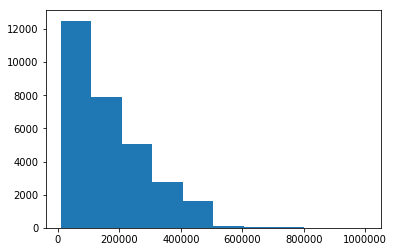

In [27]:
plt.hist(credit_data['LIMIT_BAL'])
plt.show()


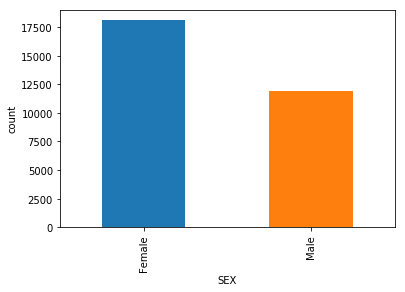

In [28]:
credit_data['SEX'].replace({1:'Male', 2:'Female'}).value_counts().plot(kind='bar')
plt.xlabel("SEX")
plt.ylabel("count")
plt.show()


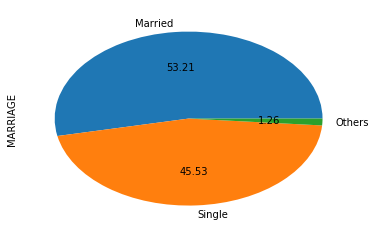

In [29]:
credit_data['MARRIAGE'].replace({1:'Single', 2:'Married', 3:'Others'}).value_counts().plot(kind='pie',autopct='%.2f') #replaced '1':single, '2':'married, '3':Others

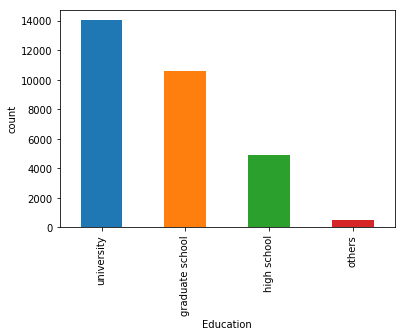

In [30]:
credit_data['EDUCATION'].replace({1:'graduate school', 2:'university', 3:'high school', 4:'others'}).value_counts().plot(kind='bar')
plt.xlabel("Education")
plt.ylabel("count")
plt.show()

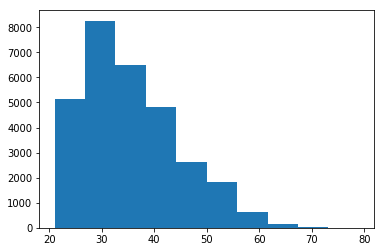

In [31]:
plt.hist(credit_data['AGE'])
plt.show()

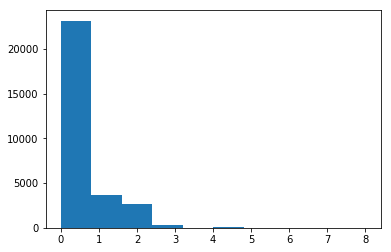

In [32]:
plt.hist(credit_data['PAY_1'])
plt.show()

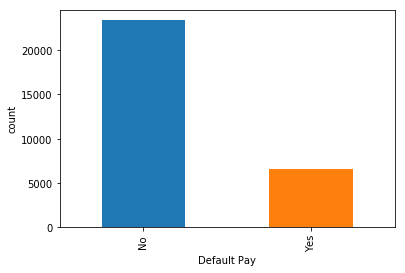

In [33]:
credit_data['default_pay'].replace({1:'Yes', 0:'No'}).value_counts().plot(kind='bar')
plt.xlabel("Default Pay")
plt.ylabel("count")
plt.show()

BI-VARIATE

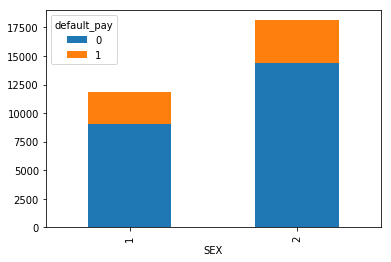

In [34]:
# 1. relationship between SEX column and default pay column

gender_pay = credit_data.groupby(['SEX', 'default_pay']).size().unstack(1)
gender_pay.plot(kind='bar', stacked = True)

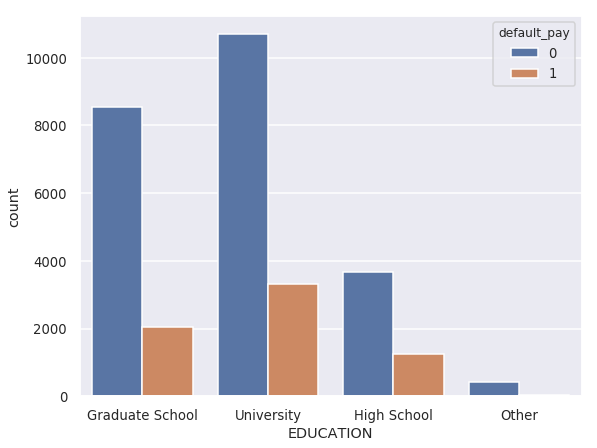

In [35]:
# 2. relationship between education column and default pay column

sns.set(rc={'figure.figsize':(9,7)})
sns.set_context("talk", font_scale=0.8)

edu = sns.countplot(x='EDUCATION', hue='default_pay', data=credit_data)
edu.set_xticklabels(['Graduate School','University','High School','Other'])
plt.show()

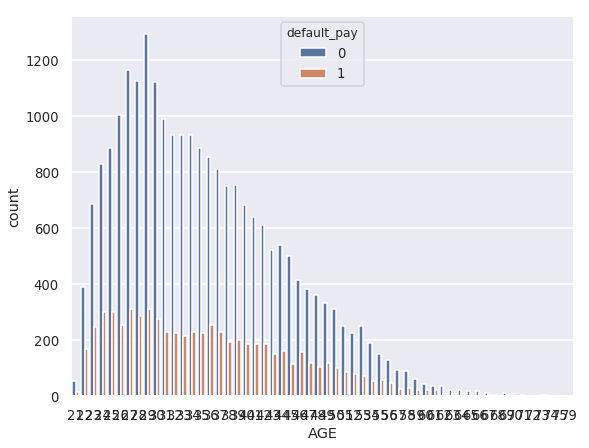

In [36]:
sns.set(rc={'figure.figsize':(9,7)})
sns.set_context("talk", font_scale=0.8)

edu = sns.countplot(x='AGE', hue='default_pay', data=credit_data)
#edu.set_xticklabels(['Graduate School','University','High School','Other'])
plt.show()

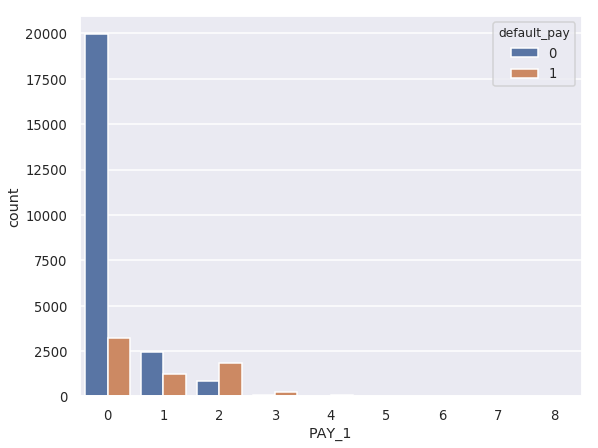

In [37]:
sns.set(rc={'figure.figsize':(9,7)})
sns.set_context("talk", font_scale=0.8)

edu = sns.countplot(x='PAY_1', hue='default_pay', data=credit_data)
#edu.set_xticklabels(['Graduate School','University','High School','Other'])
plt.show()

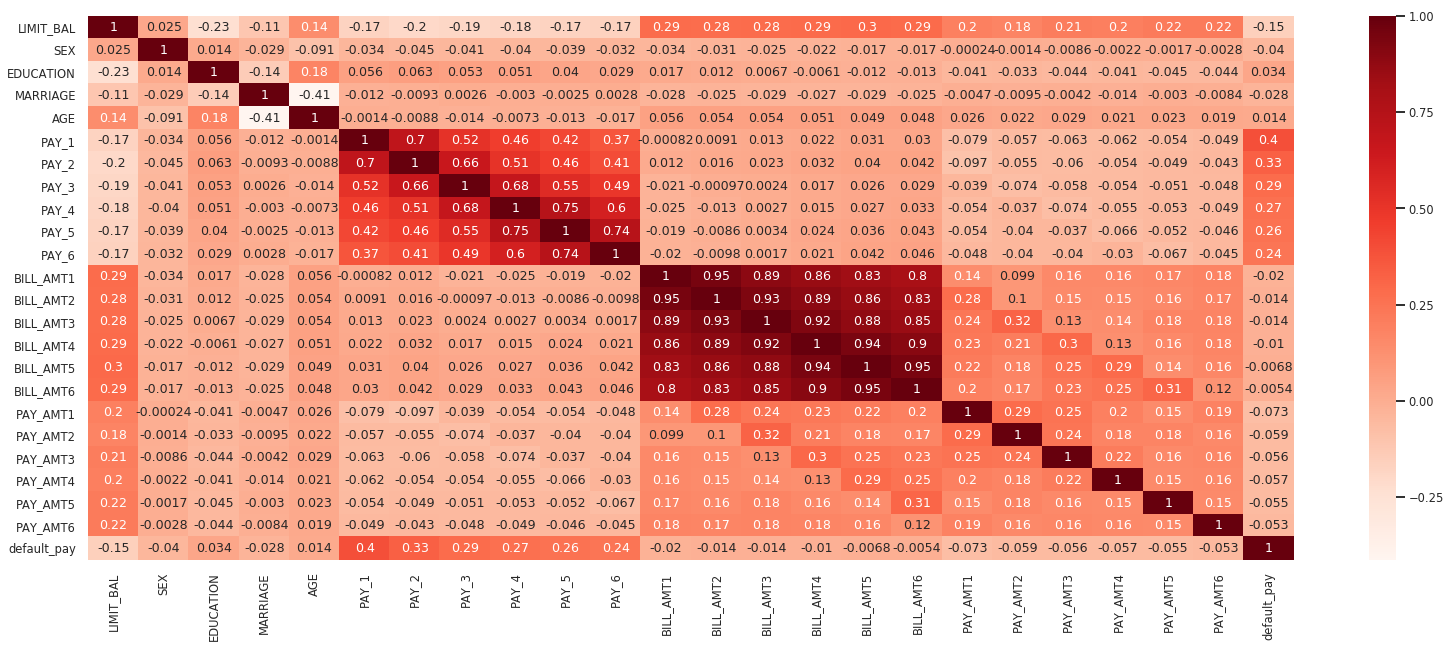

In [38]:
sns.set(rc={'figure.figsize':(27,10)})
sns.set_context("talk", font_scale=0.7)
    
sns.heatmap(credit_data.iloc[:,0:].corr(), cmap='Reds', annot=True);

### DATA MODELLING -> CLASSIFICATION

### KNN ALGORITHM

In [39]:
#KNN algorithm with "default" parameters and 50% split for both train and test

from sklearn.model_selection import train_test_split

#Splitting the data in train/test split(train - 50% and test - 50%)

features = credit_data.drop('default_pay', axis=1)
target = credit_data['default_pay']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.5, random_state=0)

print("Shape of X_train and y_train values after (50%-50%) splitting")
print("X_train value for 50-50 split", X_train.shape)
print("X_test value for 50-50 split", X_test.shape)
print("y_train value for 50-50 split" , y_train.shape)
print("y_test value for 50-50 split", y_test.shape)
print('\n ')

#Fitting the data inside the model using X_train and y_train using default K classifier

from sklearn.neighbors import KNeighborsClassifier  
clf = KNeighborsClassifier()
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)   
print("Predicted Output Values: ")
print y_pre
print('\n')

#Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print("CONFUSION MATRIX :")
print cm
print('\n \n ')
#calculating the precision, recall, f1-score and support

from sklearn.metrics import classification_report
print("PERFORMANCE OF THE MODEL")
print classification_report(y_test,y_pre)



from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pre)
print("Accuracy :", round(score,1))

error_rate=1-score
print("Error Rate", error_rate)

Shape of X_train and y_train values after (50%-50%) splitting
('X_train value for 50-50 split', (15000, 23))
('X_test value for 50-50 split', (15000, 23))
('y_train value for 50-50 split', (15000,))
('y_test value for 50-50 split', (15000,))

 
Predicted Output Values: 
[1 0 0 ... 0 0 0]


CONFUSION MATRIX :
[[10696  1036]
 [ 2654   614]]

 
 
PERFORMANCE OF THE MODEL
              precision    recall  f1-score   support

           0       0.80      0.91      0.85     11732
           1       0.37      0.19      0.25      3268

   micro avg       0.75      0.75      0.75     15000
   macro avg       0.59      0.55      0.55     15000
weighted avg       0.71      0.75      0.72     15000

('Accuracy :', 0.8)
('Error Rate', 0.246)


In [40]:
#"Parameter tuning" with 50%-50% training-testing split where "k = 3"

from sklearn.model_selection import train_test_split

#Splitting the data in train/test split(train - 50% and test - 50%)

features = credit_data.drop('default_pay', axis=1)
target = credit_data['default_pay']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.5, random_state=0)

print("Shape of X_train and y_train values after (50%-50%) splitting")
print("X_train value for 50-50 split", X_train.shape)
print("X_test value for 50-50 split", X_test.shape)
print("y_train value for 50-50 split" , y_train.shape)
print("y_test value for 50-50 split", y_test.shape)
print('\n ')

#Fitting the data inside the model using X_train and y_train using default K classifier

from sklearn.neighbors import KNeighborsClassifier  
clf = KNeighborsClassifier(3)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)   
print("Predicted Output Values: ")
print y_pre
print('\n')

#Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print("CONFUSION MATRIX :")
print cm
print('\n \n ')
#calculating the precision, recall, f1-score and support

from sklearn.metrics import classification_report
print("PERFORMANCE OF THE MODEL")
print classification_report(y_test,y_pre)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pre)
print("Accuracy :", round(score,1))

error_rate=1-score
print("Error Rate", error_rate)

Shape of X_train and y_train values after (50%-50%) splitting
('X_train value for 50-50 split', (15000, 23))
('X_test value for 50-50 split', (15000, 23))
('y_train value for 50-50 split', (15000,))
('y_test value for 50-50 split', (15000,))

 
Predicted Output Values: 
[1 0 0 ... 0 0 0]


CONFUSION MATRIX :
[[10310  1422]
 [ 2536   732]]

 
 
PERFORMANCE OF THE MODEL
              precision    recall  f1-score   support

           0       0.80      0.88      0.84     11732
           1       0.34      0.22      0.27      3268

   micro avg       0.74      0.74      0.74     15000
   macro avg       0.57      0.55      0.55     15000
weighted avg       0.70      0.74      0.72     15000

('Accuracy :', 0.7)
('Error Rate', 0.2638666666666667)


In [41]:
#Parameter tuning with 50%-50% training-testing split where "k = 5"

from sklearn.model_selection import train_test_split

#Splitting the data in train/test split(train - 50% and test - 50%)

features = credit_data.drop('default_pay', axis=1)
target = credit_data['default_pay']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.5, random_state=0)

print("Shape of X_train and y_train values after (50%-50%) splitting")
print("X_train value for 50-50 split", X_train.shape)
print("X_test value for 50-50 split", X_test.shape)
print("y_train value for 50-50 split" , y_train.shape)
print("y_test value for 50-50 split", y_test.shape)
print('\n ')

#Fitting the data inside the model using X_train and y_train using default K classifier

from sklearn.neighbors import KNeighborsClassifier  
clf = KNeighborsClassifier(5)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)   
print("Predicted Output Values: ")
print y_pre
print('\n')

#Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print("CONFUSION MATRIX :")
print cm
print('\n \n ')
#calculating the precision, recall, f1-score and support

from sklearn.metrics import classification_report
print("PERFORMANCE OF THE MODEL")
print classification_report(y_test,y_pre)




from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pre)
print("Accuracy :", round(score,1))

error_rate=1-score
print("Error Rate", error_rate)


Shape of X_train and y_train values after (50%-50%) splitting
('X_train value for 50-50 split', (15000, 23))
('X_test value for 50-50 split', (15000, 23))
('y_train value for 50-50 split', (15000,))
('y_test value for 50-50 split', (15000,))

 
Predicted Output Values: 
[1 0 0 ... 0 0 0]


CONFUSION MATRIX :
[[10696  1036]
 [ 2654   614]]

 
 
PERFORMANCE OF THE MODEL
              precision    recall  f1-score   support

           0       0.80      0.91      0.85     11732
           1       0.37      0.19      0.25      3268

   micro avg       0.75      0.75      0.75     15000
   macro avg       0.59      0.55      0.55     15000
weighted avg       0.71      0.75      0.72     15000

('Accuracy :', 0.8)
('Error Rate', 0.246)


In [42]:
#Parameter tuning with 50%-50% training-testing split where "k = 7"

from sklearn.model_selection import train_test_split

#Splitting the data in train/test split(train - 50% and test - 50%)

features = credit_data.drop('default_pay', axis=1)
target = credit_data['default_pay']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.5, random_state=0)

print("Shape of X_train and y_train values after (50%-50%) splitting")
print("X_train value for 50-50 split", X_train.shape)
print("X_test value for 50-50 split", X_test.shape)
print("y_train value for 50-50 split" , y_train.shape)
print("y_test value for 50-50 split", y_test.shape)
print('\n ')

#Fitting the data inside the model using X_train and y_train using default K classifier

from sklearn.neighbors import KNeighborsClassifier  
clf = KNeighborsClassifier(7)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)   
print("Predicted Output Values: ")
print y_pre
print('\n')

#Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print("CONFUSION MATRIX :")
print cm
print('\n \n ')
#calculating the precision, recall, f1-score and support

from sklearn.metrics import classification_report
print("PERFORMANCE OF THE MODEL")
print classification_report(y_test,y_pre)



from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pre)
print("Accuracy :", round(score,1))

error_rate=1-score
print("Error Rate", error_rate)


Shape of X_train and y_train values after (50%-50%) splitting
('X_train value for 50-50 split', (15000, 23))
('X_test value for 50-50 split', (15000, 23))
('y_train value for 50-50 split', (15000,))
('y_test value for 50-50 split', (15000,))

 
Predicted Output Values: 
[1 0 0 ... 0 0 0]


CONFUSION MATRIX :
[[10909   823]
 [ 2744   524]]

 
 
PERFORMANCE OF THE MODEL
              precision    recall  f1-score   support

           0       0.80      0.93      0.86     11732
           1       0.39      0.16      0.23      3268

   micro avg       0.76      0.76      0.76     15000
   macro avg       0.59      0.55      0.54     15000
weighted avg       0.71      0.76      0.72     15000

('Accuracy :', 0.8)
('Error Rate', 0.2378)


In [43]:
#Converting table to matrix

features = features.iloc[:].as_matrix()    

/home/ayaz/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
from sklearn.utils import shuffle

def hillClimbing(t):
    new_Ind = []
    cur_MaxScore = 0.0
    col_num = 23
    col_Ind_Random = shuffle(range(0,col_num), random_state=1)

    for cur_f in range(0, col_num):
        new_Ind.append(col_Ind_Random[cur_f])
        newData = features[:, new_Ind]
        X_train, X_test, y_train, y_test = train_test_split(newData, credit_data.default_pay,test_size = t,random_state=0)
        clf = KNeighborsClassifier()
        fit = clf.fit(X_train, y_train)
        cur_Score = clf.score(X_test, y_test)
        if cur_Score < cur_MaxScore:
            new_Ind.remove(col_Ind_Random[cur_f])
        else:
            cur_MaxScore = cur_Score
            print "Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score)
    print new_Ind
    print("")

In [45]:
hillClimbing(0.5)
hillClimbing(0.4)
hillClimbing(0.2)

Score with 1 selected features: 0.7590666666666667
Score with 2 selected features: 0.7637333333333334
Score with 3 selected features: 0.7739333333333334
Score with 4 selected features: 0.7747333333333334
Score with 5 selected features: 0.7846
Score with 6 selected features: 0.7857333333333333
[20, 3, 10, 2, 6, 7]

Score with 1 selected features: 0.7616666666666667
Score with 2 selected features: 0.7725
Score with 3 selected features: 0.7844166666666667
Score with 4 selected features: 0.7848333333333334
Score with 5 selected features: 0.7856666666666666
Score with 6 selected features: 0.7863333333333333
Score with 7 selected features: 0.7995833333333333
[20, 10, 6, 7, 1, 9, 5]

Score with 1 selected features: 0.76
Score with 2 selected features: 0.7626666666666667
Score with 3 selected features: 0.7728333333333334
Score with 4 selected features: 0.7861666666666667
Score with 5 selected features: 0.7915
Score with 6 selected features: 0.7938333333333333
[20, 3, 10, 6, 7, 5]



In [46]:
#KNN Algorithm on 50% training and 50% testing based on selected features 

columns=['PAY_AMT4', 'MARRIAGE', 'PAY_6', 'EDUCATION', 'PAY_2', 'PAY_3','default_pay']

credit_data_new = credit_data[columns]

#credit_data_new.head()

features = credit_data_new.drop('default_pay', axis=1)
target = credit_data['default_pay']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.5, random_state=0)

print("Shape of X_train and y_train values after (50%-50%) splitting")
print("X_train value for 50-50 split", X_train.shape)
print("X_test value for 50-50 split", X_test.shape)
print("y_train value for 50-50 split" , y_train.shape)
print("y_test value for 50-50 split", y_test.shape)
print('\n ')

#Fitting the data inside the model using X_train and y_train using default K classifier

from sklearn.neighbors import KNeighborsClassifier  
clf = KNeighborsClassifier()
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)   
print("Predicted Output Values: ")
print y_pre
print('\n')

#Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print("CONFUSION MATRIX :")
print cm
print('\n \n ')
#calculating the precision, recall, f1-score and support

from sklearn.metrics import classification_report
print("PERFORMANCE OF THE MODEL")
print classification_report(y_test,y_pre)


from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pre)
print("Accuracy :", round(score,1))

error_rate=1-score
print("Error Rate", error_rate)

Shape of X_train and y_train values after (50%-50%) splitting
('X_train value for 50-50 split', (15000, 6))
('X_test value for 50-50 split', (15000, 6))
('y_train value for 50-50 split', (15000,))
('y_test value for 50-50 split', (15000,))

 
Predicted Output Values: 
[1 0 0 ... 0 1 0]


CONFUSION MATRIX :
[[11016   716]
 [ 2498   770]]

 
 
PERFORMANCE OF THE MODEL
              precision    recall  f1-score   support

           0       0.82      0.94      0.87     11732
           1       0.52      0.24      0.32      3268

   micro avg       0.79      0.79      0.79     15000
   macro avg       0.67      0.59      0.60     15000
weighted avg       0.75      0.79      0.75     15000

('Accuracy :', 0.8)
('Error Rate', 0.21426666666666672)


In [47]:
#KNN algorithm with "default" parameters and 60% train split and 40% test

from sklearn.model_selection import train_test_split

#Splitting the data in train/test split(train - 60% and test - 40%)

features = credit_data.drop('default_pay', axis=1)
target = credit_data['default_pay']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.4, random_state=0)

print("Shape of X_train and y_train values after (60%-40%) splitting")
print("X_train value for 60-40 split", X_train.shape)
print("X_test value for 60-40 split", X_test.shape)
print("y_train value for 60-40 split" , y_train.shape)
print("y_test value for 60-40 split", y_test.shape)
print('\n ')

#Fitting the data inside the model using X_train and y_train using default K classifier

from sklearn.neighbors import KNeighborsClassifier  
clf = KNeighborsClassifier()
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)   
print("Predicted Output Values: ")
print y_pre
print('\n')

#Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print("CONFUSION MATRIX :")
print cm
print('\n \n ')
#calculating the precision, recall, f1-score and support

from sklearn.metrics import classification_report
print("PERFORMANCE OF THE MODEL")
print classification_report(y_test,y_pre)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pre)
print("Accuracy :", round(score,1))

error_rate=1-score
print("Error Rate", error_rate)

Shape of X_train and y_train values after (60%-40%) splitting
('X_train value for 60-40 split', (18000, 23))
('X_test value for 60-40 split', (12000, 23))
('y_train value for 60-40 split', (18000,))
('y_test value for 60-40 split', (12000,))

 
Predicted Output Values: 
[1 0 0 ... 0 0 0]


CONFUSION MATRIX :
[[8582  826]
 [2103  489]]

 
 
PERFORMANCE OF THE MODEL
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      9408
           1       0.37      0.19      0.25      2592

   micro avg       0.76      0.76      0.76     12000
   macro avg       0.59      0.55      0.55     12000
weighted avg       0.71      0.76      0.72     12000

('Accuracy :', 0.8)
('Error Rate', 0.24408333333333332)


In [48]:
#"Parameter tuning" with 60%-40% training-testing split where "k = 3"

from sklearn.model_selection import train_test_split

#Splitting the data in train/test split(train - 60% and test - 40%)

features = credit_data.drop('default_pay', axis=1)
target = credit_data['default_pay']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.4, random_state=0)

print("Shape of X_train and y_train values after (60%-40%) splitting")
print("X_train value for 60-40 split", X_train.shape)
print("X_test value for 60-40 split", X_test.shape)
print("y_train value for 60-40 split" , y_train.shape)
print("y_test value for 60-40 split", y_test.shape)
print('\n ')

#Fitting the data inside the model using X_train and y_train using default K classifier

from sklearn.neighbors import KNeighborsClassifier  
clf = KNeighborsClassifier(3)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)   
print("Predicted Output Values: ")
print y_pre
print('\n')

#Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print("CONFUSION MATRIX :")
print cm
print('\n \n ')
#calculating the precision, recall, f1-score and support

from sklearn.metrics import classification_report
print("PERFORMANCE OF THE MODEL")
print classification_report(y_test,y_pre)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pre)
print("Accuracy :", round(score,1))

error_rate=1-score
print("Error Rate", error_rate)

Shape of X_train and y_train values after (60%-40%) splitting
('X_train value for 60-40 split', (18000, 23))
('X_test value for 60-40 split', (12000, 23))
('y_train value for 60-40 split', (18000,))
('y_test value for 60-40 split', (12000,))

 
Predicted Output Values: 
[1 1 0 ... 0 1 0]


CONFUSION MATRIX :
[[8266 1142]
 [2005  587]]

 
 
PERFORMANCE OF THE MODEL
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      9408
           1       0.34      0.23      0.27      2592

   micro avg       0.74      0.74      0.74     12000
   macro avg       0.57      0.55      0.56     12000
weighted avg       0.70      0.74      0.72     12000

('Accuracy :', 0.7)
('Error Rate', 0.26225)


In [49]:
#"Parameter tuning" with 60%-40% training-testing split where "k = 5"

from sklearn.model_selection import train_test_split

#Splitting the data in train/test split(train - 60% and test - 40%)

features = credit_data.drop('default_pay', axis=1)
target = credit_data['default_pay']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.4, random_state=0)

print("Shape of X_train and y_train values after (60%-40%) splitting")
print("X_train value for 60-40 split", X_train.shape)
print("X_test value for 60-40 split", X_test.shape)
print("y_train value for 60-40 split" , y_train.shape)
print("y_test value for 60-40 split", y_test.shape)
print('\n ')

#Fitting the data inside the model using X_train and y_train using default K classifier

from sklearn.neighbors import KNeighborsClassifier  
clf = KNeighborsClassifier(5)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)   
print("Predicted Output Values: ")
print y_pre
print('\n')

#Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print("CONFUSION MATRIX :")
print cm
print('\n \n ')
#calculating the precision, recall, f1-score and support

from sklearn.metrics import classification_report
print("PERFORMANCE OF THE MODEL")
print classification_report(y_test,y_pre)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pre)
print("Accuracy :", round(score,1))

error_rate=1-score
print("Error Rate", error_rate)

Shape of X_train and y_train values after (60%-40%) splitting
('X_train value for 60-40 split', (18000, 23))
('X_test value for 60-40 split', (12000, 23))
('y_train value for 60-40 split', (18000,))
('y_test value for 60-40 split', (12000,))

 
Predicted Output Values: 
[1 0 0 ... 0 0 0]


CONFUSION MATRIX :
[[8582  826]
 [2103  489]]

 
 
PERFORMANCE OF THE MODEL
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      9408
           1       0.37      0.19      0.25      2592

   micro avg       0.76      0.76      0.76     12000
   macro avg       0.59      0.55      0.55     12000
weighted avg       0.71      0.76      0.72     12000

('Accuracy :', 0.8)
('Error Rate', 0.24408333333333332)


In [50]:
#"Parameter tuning" with 60%-40% training-testing split where "k = 7"

from sklearn.model_selection import train_test_split

#Splitting the data in train/test split(train - 60% and test - 40%)

features = credit_data.drop('default_pay', axis=1)
target = credit_data['default_pay']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.4, random_state=0)

print("Shape of X_train and y_train values after (60%-40%) splitting")
print("X_train value for 60-40 split", X_train.shape)
print("X_test value for 60-40 split", X_test.shape)
print("y_train value for 60-40 split" , y_train.shape)
print("y_test value for 60-40 split", y_test.shape)
print('\n ')

#Fitting the data inside the model using X_train and y_train using default K classifier

from sklearn.neighbors import KNeighborsClassifier  
clf = KNeighborsClassifier(7)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)   
print("Predicted Output Values: ")
print y_pre
print('\n')

#Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print("CONFUSION MATRIX :")
print cm
print('\n \n ')
#calculating the precision, recall, f1-score and support

from sklearn.metrics import classification_report
print("PERFORMANCE OF THE MODEL")
print classification_report(y_test,y_pre)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pre)
print("Accuracy :", round(score,1))

error_rate=1-score
print("Error Rate", error_rate)

Shape of X_train and y_train values after (60%-40%) splitting
('X_train value for 60-40 split', (18000, 23))
('X_test value for 60-40 split', (12000, 23))
('y_train value for 60-40 split', (18000,))
('y_test value for 60-40 split', (12000,))

 
Predicted Output Values: 
[1 0 0 ... 0 0 0]


CONFUSION MATRIX :
[[8757  651]
 [2174  418]]

 
 
PERFORMANCE OF THE MODEL
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      9408
           1       0.39      0.16      0.23      2592

   micro avg       0.76      0.76      0.76     12000
   macro avg       0.60      0.55      0.54     12000
weighted avg       0.71      0.76      0.72     12000

('Accuracy :', 0.8)
('Error Rate', 0.23541666666666672)


In [51]:
#KNN with 60-40% data based on selected features.

columns = ['PAY_AMT4', 'PAY_6', 'PAY_2', 'PAY_3', 'SEX', 'PAY_5', 'PAY_1', 'default_pay'] 
credit_data_new = credit_data[columns]

#credit_data_new.head()

features = credit_data_new.drop('default_pay', axis=1)
target = credit_data['default_pay']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.4, random_state=0)

print("Shape of X_train and y_train values after (60%-40%) splitting")
print("X_train value for 60-40 split", X_train.shape)
print("X_test value for 60-40 split", X_test.shape)
print("y_train value for 60-40 split" , y_train.shape)
print("y_test value for 60-40 split", y_test.shape)
print('\n ')

#Fitting the data inside the model using X_train and y_train using default K classifier

from sklearn.neighbors import KNeighborsClassifier  
clf = KNeighborsClassifier()
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)   
print("Predicted Output Values: ")
print y_pre
print('\n')

#Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print("CONFUSION MATRIX :")
print cm
print('\n \n ')
#calculating the precision, recall, f1-score and support

from sklearn.metrics import classification_report
print("PERFORMANCE OF THE MODEL")
print classification_report(y_test,y_pre)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pre)
print("Accuracy :", round(score,1))

error_rate=1-score
print("Error Rate", error_rate)

Shape of X_train and y_train values after (60%-40%) splitting
('X_train value for 60-40 split', (18000, 7))
('X_test value for 60-40 split', (12000, 7))
('y_train value for 60-40 split', (18000,))
('y_test value for 60-40 split', (12000,))

 
Predicted Output Values: 
[1 0 0 ... 0 0 0]


CONFUSION MATRIX :
[[8886  522]
 [1883  709]]

 
 
PERFORMANCE OF THE MODEL
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      9408
           1       0.58      0.27      0.37      2592

   micro avg       0.80      0.80      0.80     12000
   macro avg       0.70      0.61      0.63     12000
weighted avg       0.77      0.80      0.77     12000

('Accuracy :', 0.8)
('Error Rate', 0.2004166666666667)


In [52]:
#KNN algorithm with default parameters and 80% train split and 20% test

from sklearn.model_selection import train_test_split

#Splitting the data in train/test split(train - 80% and test - 20%)

features = credit_data.drop('default_pay', axis=1)
target = credit_data['default_pay']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state=0)

print("Shape of X_train and y_train values after (80%-20%) splitting")
print("X_train value for 80-20 split", X_train.shape)
print("X_test value for 80-20 split", X_test.shape)
print("y_train value for 80-20 split" , y_train.shape)
print("y_test value for 80-20 split", y_test.shape)
print('\n ')

#Fitting the data inside the model using X_train and y_train using default K classifier

from sklearn.neighbors import KNeighborsClassifier  
clf = KNeighborsClassifier()
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)   
print("Predicted Output Values: ")
print y_pre
print('\n')

#Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print("CONFUSION MATRIX :")
print cm
print('\n \n ')
#calculating the precision, recall, f1-score and support

from sklearn.metrics import classification_report
print("PERFORMANCE OF THE MODEL")
print classification_report(y_test,y_pre)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pre)
print("Accuracy :", round(score,1))

error_rate=1-score
print("Error Rate", error_rate)

Shape of X_train and y_train values after (80%-20%) splitting
('X_train value for 80-20 split', (24000, 23))
('X_test value for 80-20 split', (6000, 23))
('y_train value for 80-20 split', (24000,))
('y_test value for 80-20 split', (6000,))

 
Predicted Output Values: 
[1 1 0 ... 0 0 0]


CONFUSION MATRIX :
[[4325  378]
 [1046  251]]

 
 
PERFORMANCE OF THE MODEL
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      4703
           1       0.40      0.19      0.26      1297

   micro avg       0.76      0.76      0.76      6000
   macro avg       0.60      0.56      0.56      6000
weighted avg       0.72      0.76      0.73      6000

('Accuracy :', 0.8)
('Error Rate', 0.23733333333333329)


In [53]:
#KNN algorithm with parameter tuning on 80% train split and 20% test 'K = 3'

from sklearn.model_selection import train_test_split

#Splitting the data in train/test split(train - 80% and test - 20%)

features = credit_data.drop('default_pay', axis=1)
target = credit_data['default_pay']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state=0)

print("Shape of X_train and y_train values after (80%-20%) splitting")
print("X_train value for 80-20 split", X_train.shape)
print("X_test value for 80-20 split", X_test.shape)
print("y_train value for 80-20 split" , y_train.shape)
print("y_test value for 80-20 split", y_test.shape)
print('\n ')

#Fitting the data inside the model using X_train and y_train using default K classifier

from sklearn.neighbors import KNeighborsClassifier  
clf = KNeighborsClassifier(3)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)   
print("Predicted Output Values: ")
print y_pre
print('\n')

#Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print("CONFUSION MATRIX :")
print cm
print('\n \n ')
#calculating the precision, recall, f1-score and support

from sklearn.metrics import classification_report
print("PERFORMANCE OF THE MODEL")
print classification_report(y_test,y_pre)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pre)
print("Accuracy :", round(score,1))

error_rate=1-score
print("Error Rate", error_rate)

Shape of X_train and y_train values after (80%-20%) splitting
('X_train value for 80-20 split', (24000, 23))
('X_test value for 80-20 split', (6000, 23))
('y_train value for 80-20 split', (24000,))
('y_test value for 80-20 split', (6000,))

 
Predicted Output Values: 
[1 0 0 ... 0 1 0]


CONFUSION MATRIX :
[[4126  577]
 [1007  290]]

 
 
PERFORMANCE OF THE MODEL
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      4703
           1       0.33      0.22      0.27      1297

   micro avg       0.74      0.74      0.74      6000
   macro avg       0.57      0.55      0.55      6000
weighted avg       0.70      0.74      0.72      6000

('Accuracy :', 0.7)
('Error Rate', 0.264)


In [54]:
#KNN algorithm with parameter tuning on 80% train split and 20% test 'K = 5'

from sklearn.model_selection import train_test_split

#Splitting the data in train/test split(train - 80% and test - 20%)

features = credit_data.drop('default_pay', axis=1)
target = credit_data['default_pay']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state=0)

print("Shape of X_train and y_train values after (80%-20%) splitting")
print("X_train value for 80-20 split", X_train.shape)
print("X_test value for 80-20 split", X_test.shape)
print("y_train value for 80-20 split" , y_train.shape)
print("y_test value for 80-20 split", y_test.shape)
print('\n ')

#Fitting the data inside the model using X_train and y_train using default K classifier

from sklearn.neighbors import KNeighborsClassifier  
clf = KNeighborsClassifier(5)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)   
print("Predicted Output Values: ")
print y_pre
print('\n')

#Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print("CONFUSION MATRIX :")
print cm
print('\n \n ')
#calculating the precision, recall, f1-score and support

from sklearn.metrics import classification_report
print("PERFORMANCE OF THE MODEL")
print classification_report(y_test,y_pre)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pre)
print("Accuracy :", round(score,1))

error_rate=1-score
print("Error Rate", error_rate)

Shape of X_train and y_train values after (80%-20%) splitting
('X_train value for 80-20 split', (24000, 23))
('X_test value for 80-20 split', (6000, 23))
('y_train value for 80-20 split', (24000,))
('y_test value for 80-20 split', (6000,))

 
Predicted Output Values: 
[1 1 0 ... 0 0 0]


CONFUSION MATRIX :
[[4325  378]
 [1046  251]]

 
 
PERFORMANCE OF THE MODEL
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      4703
           1       0.40      0.19      0.26      1297

   micro avg       0.76      0.76      0.76      6000
   macro avg       0.60      0.56      0.56      6000
weighted avg       0.72      0.76      0.73      6000

('Accuracy :', 0.8)
('Error Rate', 0.23733333333333329)


In [55]:
#KNN algorithm with parameter tuning on 80% train split and 20% test 'K = 7'

from sklearn.model_selection import train_test_split

#Splitting the data in train/test split(train - 80% and test - 20%)

features = credit_data.drop('default_pay', axis=1)
target = credit_data['default_pay']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state=0)

print("Shape of X_train and y_train values after (80%-20%) splitting")
print("X_train value for 80-20 split", X_train.shape)
print("X_test value for 80-20 split", X_test.shape)
print("y_train value for 80-20 split" , y_train.shape)
print("y_test value for 80-20 split", y_test.shape)
print('\n ')

#Fitting the data inside the model using X_train and y_train using default K classifier

from sklearn.neighbors import KNeighborsClassifier  
clf = KNeighborsClassifier(7)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)   
print("Predicted Output Values: ")
print y_pre
print('\n')

#Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print("CONFUSION MATRIX :")
print cm
print('\n \n ')
#calculating the precision, recall, f1-score and support

from sklearn.metrics import classification_report
print("PERFORMANCE OF THE MODEL")
print classification_report(y_test,y_pre)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pre)
print("Accuracy :", round(score,1))

error_rate=1-score
print("Error Rate", error_rate)

Shape of X_train and y_train values after (80%-20%) splitting
('X_train value for 80-20 split', (24000, 23))
('X_test value for 80-20 split', (6000, 23))
('y_train value for 80-20 split', (24000,))
('y_test value for 80-20 split', (6000,))

 
Predicted Output Values: 
[1 0 0 ... 0 1 0]


CONFUSION MATRIX :
[[4386  317]
 [1088  209]]

 
 
PERFORMANCE OF THE MODEL
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      4703
           1       0.40      0.16      0.23      1297

   micro avg       0.77      0.77      0.77      6000
   macro avg       0.60      0.55      0.55      6000
weighted avg       0.71      0.77      0.73      6000

('Accuracy :', 0.8)
('Error Rate', 0.23416666666666663)


In [56]:
columns = ['PAY_AMT4', 'MARRIAGE' ,'PAY_6',  'PAY_2', 'PAY_3', 'PAY_1', 'default_pay']
credit_data_new = credit_data[columns]

#credit_data_new.head()

features = credit_data_new.drop('default_pay', axis=1)
target = credit_data['default_pay']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.4, random_state=0)

print("Shape of X_train and y_train values after (60%-40%) splitting")
print("X_train value for 60-40 split", X_train.shape)
print("X_test value for 60-40 split", X_test.shape)
print("y_train value for 60-40 split" , y_train.shape)
print("y_test value for 60-40 split", y_test.shape)
print('\n ')

#Fitting the data inside the model using X_train and y_train using default K classifier

from sklearn.neighbors import KNeighborsClassifier  
clf = KNeighborsClassifier()
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)   
print("Predicted Output Values: ")
print y_pre
print('\n')

#Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print("CONFUSION MATRIX :")
print cm
print('\n \n ')
#calculating the precision, recall, f1-score and support

from sklearn.metrics import classification_report
print("PERFORMANCE OF THE MODEL")
print classification_report(y_test,y_pre)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pre)
print("Accuracy :", round(score,1))

error_rate=1-score
print("Error Rate", error_rate)

Shape of X_train and y_train values after (60%-40%) splitting
('X_train value for 60-40 split', (18000, 6))
('X_test value for 60-40 split', (12000, 6))
('y_train value for 60-40 split', (18000,))
('y_test value for 60-40 split', (12000,))

 
Predicted Output Values: 
[1 1 0 ... 0 0 0]


CONFUSION MATRIX :
[[8917  491]
 [1907  685]]

 
 
PERFORMANCE OF THE MODEL
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      9408
           1       0.58      0.26      0.36      2592

   micro avg       0.80      0.80      0.80     12000
   macro avg       0.70      0.61      0.62     12000
weighted avg       0.77      0.80      0.77     12000

('Accuracy :', 0.8)
('Error Rate', 0.1998333333333333)


### DECISION TREE

In [57]:
#For 50% of Training data and 50% of testing data with default parameters

from sklearn.model_selection import train_test_split
  

#Splitting the data in train/test split(train - 50% and test - 50%)

features = credit_data.drop('default_pay', axis=1)
target = credit_data['default_pay']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.5, random_state=0)

print("Shape of X_train and y_train values after (50%-50%) splitting")
print("X_train value for 50-50 split", X_train.shape)
print("X_test value for 50-50 split", X_test.shape)
print("y_train value for 50-50 split" , y_train.shape)
print("y_test value for 50-50 split", y_test.shape)
print('\n ')

#Fitting the data inside the model using X_train and y_train using default K classifier

from sklearn.tree import DecisionTreeClassifier  
clf = DecisionTreeClassifier()
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)   
print("Predicted Output Values: ")
print y_pre
print('\n')

#Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print("CONFUSION MATRIX :")
print cm
print('\n \n ')
#calculating the precision, recall, f1-score and support

from sklearn.metrics import classification_report
print("PERFORMANCE OF THE MODEL")
print classification_report(y_test,y_pre)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pre)
print("Accuracy :", round(score,1))

error_rate=1-score
print("Error Rate", error_rate)

Shape of X_train and y_train values after (50%-50%) splitting
('X_train value for 50-50 split', (15000, 23))
('X_test value for 50-50 split', (15000, 23))
('y_train value for 50-50 split', (15000,))
('y_test value for 50-50 split', (15000,))

 
Predicted Output Values: 
[0 0 1 ... 0 1 0]


CONFUSION MATRIX :
[[9530 2202]
 [1918 1350]]

 
 
PERFORMANCE OF THE MODEL
              precision    recall  f1-score   support

           0       0.83      0.81      0.82     11732
           1       0.38      0.41      0.40      3268

   micro avg       0.73      0.73      0.73     15000
   macro avg       0.61      0.61      0.61     15000
weighted avg       0.73      0.73      0.73     15000

('Accuracy :', 0.7)
('Error Rate', 0.2746666666666666)


In [58]:
#For 50% of Training data and 50% of testing data with parameters tuning criterion = 'entropy'

from sklearn.model_selection import train_test_split
  

#Splitting the data in train/test split(train - 50% and test - 50%)

features = credit_data.drop('default_pay', axis=1)
target = credit_data['default_pay']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.5, random_state=0)

print("Shape of X_train and y_train values after (50%-50%) splitting")
print("X_train value for 50-50 split", X_train.shape)
print("X_test value for 50-50 split", X_test.shape)
print("y_train value for 50-50 split" , y_train.shape)
print("y_test value for 50-50 split", y_test.shape)
print('\n ')

#Fitting the data inside the model using X_train and y_train using default K classifier

from sklearn.tree import DecisionTreeClassifier  
clf = DecisionTreeClassifier(criterion = 'entropy')
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)   
print("Predicted Output Values: ")
print y_pre
print('\n')

#Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print("CONFUSION MATRIX :")
print cm
print('\n \n ')
#calculating the precision, recall, f1-score and support

from sklearn.metrics import classification_report
print("PERFORMANCE OF THE MODEL")
print classification_report(y_test,y_pre)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pre)
print("Accuracy :", round(score,1))

error_rate=1-score
print("Error Rate", error_rate)

Shape of X_train and y_train values after (50%-50%) splitting
('X_train value for 50-50 split', (15000, 23))
('X_test value for 50-50 split', (15000, 23))
('y_train value for 50-50 split', (15000,))
('y_test value for 50-50 split', (15000,))

 
Predicted Output Values: 
[0 0 0 ... 1 0 0]


CONFUSION MATRIX :
[[9537 2195]
 [1941 1327]]

 
 
PERFORMANCE OF THE MODEL
              precision    recall  f1-score   support

           0       0.83      0.81      0.82     11732
           1       0.38      0.41      0.39      3268

   micro avg       0.72      0.72      0.72     15000
   macro avg       0.60      0.61      0.61     15000
weighted avg       0.73      0.72      0.73     15000

('Accuracy :', 0.7)
('Error Rate', 0.2757333333333334)


In [59]:
#For 50% of Training data and 50% of testing data with parameters tuning (max_features = 5)

from sklearn.model_selection import train_test_split
  

#Splitting the data in train/test split(train - 50% and test - 50%)

features = credit_data.drop('default_pay', axis=1)
target = credit_data['default_pay']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.5, random_state=0)

print("Shape of X_train and y_train values after (50%-50%) splitting")
print("X_train value for 50-50 split", X_train.shape)
print("X_test value for 50-50 split", X_test.shape)
print("y_train value for 50-50 split" , y_train.shape)
print("y_test value for 50-50 split", y_test.shape)
print('\n ')

#Fitting the data inside the model using X_train and y_train using default K classifier

from sklearn.tree import DecisionTreeClassifier  
clf = DecisionTreeClassifier(max_features = 5)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)   
print("Predicted Output Values: ")
print y_pre
print('\n')

#Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print("CONFUSION MATRIX :")
print cm
print('\n \n ')
#calculating the precision, recall, f1-score and support

from sklearn.metrics import classification_report
print("PERFORMANCE OF THE MODEL")
print classification_report(y_test,y_pre)


from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pre)
print("Accuracy :", round(score,1))

error_rate=1-score
print("Error Rate", error_rate)

Shape of X_train and y_train values after (50%-50%) splitting
('X_train value for 50-50 split', (15000, 23))
('X_test value for 50-50 split', (15000, 23))
('y_train value for 50-50 split', (15000,))
('y_test value for 50-50 split', (15000,))

 
Predicted Output Values: 
[0 1 0 ... 1 0 0]


CONFUSION MATRIX :
[[9581 2151]
 [1921 1347]]

 
 
PERFORMANCE OF THE MODEL
              precision    recall  f1-score   support

           0       0.83      0.82      0.82     11732
           1       0.39      0.41      0.40      3268

   micro avg       0.73      0.73      0.73     15000
   macro avg       0.61      0.61      0.61     15000
weighted avg       0.74      0.73      0.73     15000

('Accuracy :', 0.7)
('Error Rate', 0.27146666666666663)


In [60]:
#For 50% of Training data and 50% of testing data with parameters tuning (max_features = 5 and criterion = 'entropy')

from sklearn.model_selection import train_test_split
  

#Splitting the data in train/test split(train - 50% and test - 50%)

features = credit_data.drop('default_pay', axis=1)
target = credit_data['default_pay']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.5, random_state=0)

print("Shape of X_train and y_train values after (50%-50%) splitting")
print("X_train value for 50-50 split", X_train.shape)
print("X_test value for 50-50 split", X_test.shape)
print("y_train value for 50-50 split" , y_train.shape)
print("y_test value for 50-50 split", y_test.shape)
print('\n ')

#Fitting the data inside the model using X_train and y_train using default K classifier

from sklearn.tree import DecisionTreeClassifier  
clf = DecisionTreeClassifier(criterion = 'entropy', max_features = 5)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)   
print("Predicted Output Values: ")
print y_pre
print('\n')

#Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print("CONFUSION MATRIX :")
print cm
print('\n \n ')
#calculating the precision, recall, f1-score and support

from sklearn.metrics import classification_report
print("PERFORMANCE OF THE MODEL")
print classification_report(y_test,y_pre)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pre)
print("Accuracy :", round(score,1))
44
error_rate=1-score
print("Error Rate", error_rate)


Shape of X_train and y_train values after (50%-50%) splitting
('X_train value for 50-50 split', (15000, 23))
('X_test value for 50-50 split', (15000, 23))
('y_train value for 50-50 split', (15000,))
('y_test value for 50-50 split', (15000,))

 
Predicted Output Values: 
[0 0 0 ... 1 1 0]


CONFUSION MATRIX :
[[9683 2049]
 [1967 1301]]

 
 
PERFORMANCE OF THE MODEL
              precision    recall  f1-score   support

           0       0.83      0.83      0.83     11732
           1       0.39      0.40      0.39      3268

   micro avg       0.73      0.73      0.73     15000
   macro avg       0.61      0.61      0.61     15000
weighted avg       0.73      0.73      0.73     15000

('Accuracy :', 0.7)
('Error Rate', 0.2677333333333334)


In [61]:
#HILL CLIMBING with Decision Tree

In [62]:
#Converting table to matrix

features = features.iloc[:].as_matrix()    

/home/ayaz/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [63]:
from sklearn.utils import shuffle

def hillClimbing_dec(t):
    new_Ind = []
    cur_MaxScore = 0.0
    col_num = 23
    col_Ind_Random = shuffle(range(0,col_num), random_state=1)

    for cur_f in range(0, col_num):
        new_Ind.append(col_Ind_Random[cur_f])
        newData = features[:, new_Ind]
        X_train, X_test, y_train, y_test = train_test_split(newData, credit_data.default_pay,test_size = t,random_state=0)
        clf = DecisionTreeClassifier()
        fit = clf.fit(X_train, y_train)
        cur_Score = clf.score(X_test, y_test)
        if cur_Score < cur_MaxScore:
            new_Ind.remove(col_Ind_Random[cur_f])
        else:
            cur_MaxScore = cur_Score
            print "Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score)
    print new_Ind
    print("")

In [64]:
hillClimbing_dec(0.5)
hillClimbing_dec(0.4)
hillClimbing_dec(0.2)

Score with 1 selected features: 0.7480666666666667
Score with 2 selected features: 0.7598666666666667
Score with 3 selected features: 0.7688666666666667
Score with 4 selected features: 0.7698
Score with 5 selected features: 0.7712666666666667
Score with 6 selected features: 0.7846666666666666
[20, 10, 6, 9, 8, 5]

Score with 1 selected features: 0.7535
Score with 2 selected features: 0.76275
Score with 3 selected features: 0.7743333333333333
Score with 4 selected features: 0.7749166666666667
Score with 5 selected features: 0.78825
[20, 10, 6, 9, 5]

Score with 1 selected features: 0.758
Score with 2 selected features: 0.7651666666666667
Score with 3 selected features: 0.7771666666666667
Score with 4 selected features: 0.7915
[20, 10, 6, 5]



In [65]:
#Decision Tree with 50-50% data based on selected features.

columns = ['PAY_AMT4', 'PAY_6',  'PAY_2','PAY_5', 'PAY_4' ,'PAY_1', 'default_pay'] 
credit_data_new = credit_data[columns]

#credit_data_new.head()

features = credit_data_new.drop('default_pay', axis=1)
target = credit_data['default_pay']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.5, random_state=0)

print("Shape of X_train and y_train values after (50%-50%) splitting")
print("X_train value for 50-50 split", X_train.shape)
print("X_test value for 50-50 split", X_test.shape)
print("y_train value for 50-50 split" , y_train.shape)
print("y_test value for 50-50 split", y_test.shape)
print('\n ')

#Fitting the data inside the model using X_train and y_train using default K classifier


from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)   
print("Predicted Output Values: ")
print y_pre
print('\n')

#Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print("CONFUSION MATRIX :")
print cm
print('\n \n ')
#calculating the precision, recall, f1-score and support

from sklearn.metrics import classification_report

print("PERFORMANCE OF THE MODEL")
print classification_report(y_test,y_pre)
accuracy=accuracy_score(y_test,y_pre)


from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pre)
print("Accuracy :", round(score,1))

error_rate=1-score
print("Error Rate", error_rate)

Shape of X_train and y_train values after (50%-50%) splitting
('X_train value for 50-50 split', (15000, 6))
('X_test value for 50-50 split', (15000, 6))
('y_train value for 50-50 split', (15000,))
('y_test value for 50-50 split', (15000,))

 
Predicted Output Values: 
[0 0 0 ... 0 1 0]


CONFUSION MATRIX :
[[10734   998]
 [ 2223  1045]]

 
 
PERFORMANCE OF THE MODEL
              precision    recall  f1-score   support

           0       0.83      0.91      0.87     11732
           1       0.51      0.32      0.39      3268

   micro avg       0.79      0.79      0.79     15000
   macro avg       0.67      0.62      0.63     15000
weighted avg       0.76      0.79      0.77     15000

('Accuracy :', 0.8)
('Error Rate', 0.21473333333333333)


In [66]:
#For 60% of Training data and 40% of testing data with default parameters

from sklearn.model_selection import train_test_split
  

#Splitting the data in train/test split(train - 50% and test - 50%)

features = credit_data.drop('default_pay', axis=1)
target = credit_data['default_pay']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.4, random_state=0)

print("Shape of X_train and y_train values after (60%-40%) splitting")
print("X_train value for 60-40 split", X_train.shape)
print("X_test value for 60-40 split", X_test.shape)
print("y_train value for 60-40 split" , y_train.shape)
print("y_test value for 60-40 split", y_test.shape)
print('\n ')

#Fitting the data inside the model using X_train and y_train using default K classifier

from sklearn.tree import DecisionTreeClassifier  
clf = DecisionTreeClassifier()
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)   
print("Predicted Output Values: ")
print y_pre
print('\n')

#Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print("CONFUSION MATRIX :")
print cm
print('\n \n ')
#calculating the precision, recall, f1-score and support

from sklearn.metrics import classification_report
print("PERFORMANCE OF THE MODEL")
print classification_report(y_test,y_pre)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pre)
print("Accuracy :", round(score,1))

error_rate=1-score
print("Error Rate", error_rate)


Shape of X_train and y_train values after (60%-40%) splitting
('X_train value for 60-40 split', (18000, 23))
('X_test value for 60-40 split', (12000, 23))
('y_train value for 60-40 split', (18000,))
('y_test value for 60-40 split', (12000,))

 
Predicted Output Values: 
[0 0 0 ... 1 0 0]


CONFUSION MATRIX :
[[7642 1766]
 [1546 1046]]

 
 
PERFORMANCE OF THE MODEL
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      9408
           1       0.37      0.40      0.39      2592

   micro avg       0.72      0.72      0.72     12000
   macro avg       0.60      0.61      0.60     12000
weighted avg       0.73      0.72      0.73     12000

('Accuracy :', 0.7)
('Error Rate', 0.276)


In [67]:
#For 60% of Training data and 40% of testing data with parameters criterion = 'entropy'

from sklearn.model_selection import train_test_split
  

#Splitting the data in train/test split(train - 50% and test - 50%)

features = credit_data.drop('default_pay', axis=1)
target = credit_data['default_pay']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.4, random_state=0)

print("Shape of X_train and y_train values after (60%-40%) splitting")
print("X_train value for 60-40 split", X_train.shape)
print("X_test value for 60-40 split", X_test.shape)
print("y_train value for 60-40 split" , y_train.shape)
print("y_test value for 60-40 split", y_test.shape)
print('\n ')

#Fitting the data inside the model using X_train and y_train using default K classifier

from sklearn.tree import DecisionTreeClassifier  
clf = DecisionTreeClassifier(criterion = 'entropy')
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)   
print("Predicted Output Values: ")
print y_pre
print('\n')

#Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print("CONFUSION MATRIX :")
print cm
print('\n \n ')
#calculating the precision, recall, f1-score and support

from sklearn.metrics import classification_report
print("PERFORMANCE OF THE MODEL")
print classification_report(y_test,y_pre)


from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pre)
print("Accuracy :", round(score,1))

error_rate=1-score
print("Error Rate", error_rate)

Shape of X_train and y_train values after (60%-40%) splitting
('X_train value for 60-40 split', (18000, 23))
('X_test value for 60-40 split', (12000, 23))
('y_train value for 60-40 split', (18000,))
('y_test value for 60-40 split', (12000,))

 
Predicted Output Values: 
[0 0 0 ... 1 0 1]


CONFUSION MATRIX :
[[7811 1597]
 [1606  986]]

 
 
PERFORMANCE OF THE MODEL
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      9408
           1       0.38      0.38      0.38      2592

   micro avg       0.73      0.73      0.73     12000
   macro avg       0.61      0.61      0.61     12000
weighted avg       0.73      0.73      0.73     12000

('Accuracy :', 0.7)
('Error Rate', 0.2669166666666667)


In [68]:
#For 60% of Training data and 40% of testing data with parameters max_feature = 5

from sklearn.model_selection import train_test_split
  

#Splitting the data in train/test split(train - 50% and test - 50%)

features = credit_data.drop('default_pay', axis=1)
target = credit_data['default_pay']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.4, random_state=0)

print("Shape of X_train and y_train values after (60%-40%) splitting")
print("X_train value for 60-40 split", X_train.shape)
print("X_test value for 60-40 split", X_test.shape)
print("y_train value for 60-40 split" , y_train.shape)
print("y_test value for 60-40 split", y_test.shape)
print('\n ')

#Fitting the data inside the model using X_train and y_train using default K classifier

from sklearn.tree import DecisionTreeClassifier  
clf = DecisionTreeClassifier(max_features = 5)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)   
print("Predicted Output Values: ")
print y_pre
print('\n')

#Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print("CONFUSION MATRIX :")
print cm
print('\n \n ')
#calculating the precision, recall, f1-score and support

from sklearn.metrics import classification_report
print("PERFORMANCE OF THE MODEL")
print classification_report(y_test,y_pre)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pre)
print("Accuracy :", round(score,1))

error_rate=1-score
print("Error Rate", error_rate)


Shape of X_train and y_train values after (60%-40%) splitting
('X_train value for 60-40 split', (18000, 23))
('X_test value for 60-40 split', (12000, 23))
('y_train value for 60-40 split', (18000,))
('y_test value for 60-40 split', (12000,))

 
Predicted Output Values: 
[0 0 0 ... 0 0 0]


CONFUSION MATRIX :
[[7702 1706]
 [1533 1059]]

 
 
PERFORMANCE OF THE MODEL
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      9408
           1       0.38      0.41      0.40      2592

   micro avg       0.73      0.73      0.73     12000
   macro avg       0.61      0.61      0.61     12000
weighted avg       0.74      0.73      0.73     12000

('Accuracy :', 0.7)
('Error Rate', 0.2699166666666667)


In [69]:
#For 60% of Training data and 40% of testing data with parameters max_feature = 5 and criterion = 'entropy' 

from sklearn.model_selection import train_test_split
  

#Splitting the data in train/test split(train - 50% and test - 50%)

features = credit_data.drop('default_pay', axis=1)
target = credit_data['default_pay']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.4, random_state=0)

print("Shape of X_train and y_train values after (60%-40%) splitting")
print("X_train value for 60-40 split", X_train.shape)
print("X_test value for 60-40 split", X_test.shape)
print("y_train value for 60-40 split" , y_train.shape)
print("y_test value for 60-40 split", y_test.shape)
print('\n ')

#Fitting the data inside the model using X_train and y_train using default K classifier

from sklearn.tree import DecisionTreeClassifier  
clf = DecisionTreeClassifier(criterion = 'entropy', max_features = 5)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)   
print("Predicted Output Values: ")
print y_pre
print('\n')

#Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print("CONFUSION MATRIX :")
print cm
print('\n \n ')
#calculating the precision, recall, f1-score and support

from sklearn.metrics import classification_report
print("PERFORMANCE OF THE MODEL")
print classification_report(y_test,y_pre)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pre)
print("Accuracy :", round(score,1))

error_rate=1-score
print("Error Rate", error_rate)


Shape of X_train and y_train values after (60%-40%) splitting
('X_train value for 60-40 split', (18000, 23))
('X_test value for 60-40 split', (12000, 23))
('y_train value for 60-40 split', (18000,))
('y_test value for 60-40 split', (12000,))

 
Predicted Output Values: 
[1 0 0 ... 0 0 0]


CONFUSION MATRIX :
[[7753 1655]
 [1505 1087]]

 
 
PERFORMANCE OF THE MODEL
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      9408
           1       0.40      0.42      0.41      2592

   micro avg       0.74      0.74      0.74     12000
   macro avg       0.62      0.62      0.62     12000
weighted avg       0.74      0.74      0.74     12000

('Accuracy :', 0.7)
('Error Rate', 0.2633333333333333)


In [70]:

#Decision Tree with 60-40% data based on selected features.

columns = ['PAY_AMT4', 'PAY_6',  'PAY_2','PAY_5', 'PAY_1', 'default_pay']
credit_data_new = credit_data[columns]

#credit_data_new.head()

features = credit_data_new.drop('default_pay', axis=1)
target = credit_data['default_pay']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.4, random_state=0)

print("Shape of X_train and y_train values after (60%-40%) splitting")
print("X_train value for 60-40 split", X_train.shape)
print("X_test value for 60-40 split", X_test.shape)
print("y_train value for 60-40 split" , y_train.shape)
print("y_test value for 60-40 split", y_test.shape)
print('\n ')

#Fitting the data inside the model using X_train and y_train using default K classifier


from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)   
print("Predicted Output Values: ")
print y_pre
print('\n')

#Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print("CONFUSION MATRIX :")
print cm
print('\n \n ')
#calculating the precision, recall, f1-score and support

from sklearn.metrics import classification_report
print("PERFORMANCE OF THE MODEL")
print classification_report(y_test,y_pre)


from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pre)
print("Accuracy :", round(score,1))

error_rate=1-score
print("Error Rate", error_rate)

Shape of X_train and y_train values after (60%-40%) splitting
('X_train value for 60-40 split', (18000, 5))
('X_test value for 60-40 split', (12000, 5))
('y_train value for 60-40 split', (18000,))
('y_test value for 60-40 split', (12000,))

 
Predicted Output Values: 
[0 0 0 ... 0 0 0]


CONFUSION MATRIX :
[[8626  782]
 [1754  838]]

 
 
PERFORMANCE OF THE MODEL
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      9408
           1       0.52      0.32      0.40      2592

   micro avg       0.79      0.79      0.79     12000
   macro avg       0.67      0.62      0.63     12000
weighted avg       0.76      0.79      0.77     12000

('Accuracy :', 0.8)
('Error Rate', 0.21133333333333337)


In [71]:
#For 80% of Training data and 20% of testing data with default parameters 

from sklearn.model_selection import train_test_split
  

#Splitting the data in train/test split(train - 80% and test - 20%)

features = credit_data.drop('default_pay', axis=1)
target = credit_data['default_pay']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state=0)

print("Shape of X_train and y_train values after (80%-20%) splitting")
print("X_train value for 80-20 split", X_train.shape)
print("X_test value for 80-20 split", X_test.shape)
print("y_train value for 80-20 split" , y_train.shape)
print("y_test value for 80-20 split", y_test.shape)
print('\n ')

#Fitting the data inside the model using X_train and y_train using default K classifier

from sklearn.tree import DecisionTreeClassifier  
clf = DecisionTreeClassifier()
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)   
print("Predicted Output Values: ")
print y_pre
print('\n')

#Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print("CONFUSION MATRIX :")
print cm
print('\n \n ')
#calculating the precision, recall, f1-score and support

from sklearn.metrics import classification_report
print("PERFORMANCE OF THE MODEL")
print classification_report(y_test,y_pre)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pre)
print("Accuracy :", round(score,1))

error_rate=1-score
print("Error Rate", error_rate)


Shape of X_train and y_train values after (80%-20%) splitting
('X_train value for 80-20 split', (24000, 23))
('X_test value for 80-20 split', (6000, 23))
('y_train value for 80-20 split', (24000,))
('y_test value for 80-20 split', (6000,))

 
Predicted Output Values: 
[0 1 0 ... 0 1 1]


CONFUSION MATRIX :
[[3844  859]
 [ 723  574]]

 
 
PERFORMANCE OF THE MODEL
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      4703
           1       0.40      0.44      0.42      1297

   micro avg       0.74      0.74      0.74      6000
   macro avg       0.62      0.63      0.62      6000
weighted avg       0.75      0.74      0.74      6000

('Accuracy :', 0.7)
('Error Rate', 0.2636666666666667)


In [72]:
#For 80% of Training data and 20% of testing data with parameters  criterion = 'entropy'

from sklearn.model_selection import train_test_split
  

#Splitting the data in train/test split(train - 80% and test - 20%)

features = credit_data.drop('default_pay', axis=1)
target = credit_data['default_pay']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state=0)

print("Shape of X_train and y_train values after (80%-20%) splitting")
print("X_train value for 80-20 split", X_train.shape)
print("X_test value for 80-20 split", X_test.shape)
print("y_train value for 80-20 split" , y_train.shape)
print("y_test value for 80-20 split", y_test.shape)
print('\n ')

#Fitting the data inside the model using X_train and y_train using default K classifier

from sklearn.tree import DecisionTreeClassifier  
clf = DecisionTreeClassifier(criterion = 'entropy')
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)   
print("Predicted Output Values: ")
print y_pre
print('\n')

#Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print("CONFUSION MATRIX :")
print cm
print('\n \n ')
#calculating the precision, recall, f1-score and support

from sklearn.metrics import classification_report
print("PERFORMANCE OF THE MODEL")
print classification_report(y_test,y_pre)


from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pre)
print("Accuracy :", round(score,1))

error_rate=1-score
print("Error Rate", error_rate)

Shape of X_train and y_train values after (80%-20%) splitting
('X_train value for 80-20 split', (24000, 23))
('X_test value for 80-20 split', (6000, 23))
('y_train value for 80-20 split', (24000,))
('y_test value for 80-20 split', (6000,))

 
Predicted Output Values: 
[0 0 0 ... 0 1 0]


CONFUSION MATRIX :
[[3884  819]
 [ 760  537]]

 
 
PERFORMANCE OF THE MODEL
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      4703
           1       0.40      0.41      0.40      1297

   micro avg       0.74      0.74      0.74      6000
   macro avg       0.62      0.62      0.62      6000
weighted avg       0.74      0.74      0.74      6000

('Accuracy :', 0.7)
('Error Rate', 0.26316666666666666)


In [73]:
#For 80% of Training data and 20% of testing data with parameters max_features = 5

from sklearn.model_selection import train_test_split
  

#Splitting the data in train/test split(train - 80% and test - 20%)

features = credit_data.drop('default_pay', axis=1)
target = credit_data['default_pay']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state=0)

print("Shape of X_train and y_train values after (80%-20%) splitting")
print("X_train value for 80-20 split", X_train.shape)
print("X_test value for 80-20 split", X_test.shape)
print("y_train value for 80-20 split" , y_train.shape)
print("y_test value for 80-20 split", y_test.shape)
print('\n ')

#Fitting the data inside the model using X_train and y_train using default K classifier

from sklearn.tree import DecisionTreeClassifier  
clf = DecisionTreeClassifier(max_features = 5)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)   
print("Predicted Output Values: ")
print y_pre
print('\n')

#Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print("CONFUSION MATRIX :")
print cm
print('\n \n ')
#calculating the precision, recall, f1-score and support

from sklearn.metrics import classification_report
print("PERFORMANCE OF THE MODEL")
print classification_report(y_test,y_pre)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pre)
print("Accuracy :", round(score,1))

error_rate=1-score
print("Error Rate", error_rate)


Shape of X_train and y_train values after (80%-20%) splitting
('X_train value for 80-20 split', (24000, 23))
('X_test value for 80-20 split', (6000, 23))
('y_train value for 80-20 split', (24000,))
('y_test value for 80-20 split', (6000,))

 
Predicted Output Values: 
[0 1 0 ... 1 1 0]


CONFUSION MATRIX :
[[3853  850]
 [ 753  544]]

 
 
PERFORMANCE OF THE MODEL
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      4703
           1       0.39      0.42      0.40      1297

   micro avg       0.73      0.73      0.73      6000
   macro avg       0.61      0.62      0.62      6000
weighted avg       0.74      0.73      0.74      6000

('Accuracy :', 0.7)
('Error Rate', 0.26716666666666666)


In [74]:
#For 80% of Training data and 20% of testing data with parameters max_features = 5 and criterion = 'entropy'

from sklearn.model_selection import train_test_split
  

#Splitting the data in train/test split(train - 80% and test - 20%)

features = credit_data.drop('default_pay', axis=1)
target = credit_data['default_pay']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state=0)

print("Shape of X_train and y_train values after (80%-20%) splitting")
print("X_train value for 80-20 split", X_train.shape)
print("X_test value for 80-20 split", X_test.shape)
print("y_train value for 80-20 split" , y_train.shape)
print("y_test value for 80-20 split", y_test.shape)
print('\n ')

#Fitting the data inside the model using X_train and y_train using default K classifier

from sklearn.tree import DecisionTreeClassifier  
clf = DecisionTreeClassifier(criterion = 'entropy', max_features = 5)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)   
print("Predicted Output Values: ")
print y_pre
print('\n')

#Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print("CONFUSION MATRIX :")
print cm
print('\n \n ')
#calculating the precision, recall, f1-score and support

from sklearn.metrics import classification_report
print("PERFORMANCE OF THE MODEL")
print classification_report(y_test,y_pre)


from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pre)
print("Accuracy :", round(score,1))

error_rate=1-score
print("Error Rate", error_rate)

Shape of X_train and y_train values after (80%-20%) splitting
('X_train value for 80-20 split', (24000, 23))
('X_test value for 80-20 split', (6000, 23))
('y_train value for 80-20 split', (24000,))
('y_test value for 80-20 split', (6000,))

 
Predicted Output Values: 
[1 1 0 ... 0 1 0]


CONFUSION MATRIX :
[[3856  847]
 [ 739  558]]

 
 
PERFORMANCE OF THE MODEL
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      4703
           1       0.40      0.43      0.41      1297

   micro avg       0.74      0.74      0.74      6000
   macro avg       0.62      0.63      0.62      6000
weighted avg       0.74      0.74      0.74      6000

('Accuracy :', 0.7)
('Error Rate', 0.2643333333333333)


In [75]:
['PAY_AMT4', 'PAY_6',  'PAY_2','PAY_1']

['PAY_AMT4', 'PAY_6', 'PAY_2', 'PAY_1']

In [76]:
#Decision Tree with 80-20% data based on selected features.

columns = ['PAY_AMT4', 'PAY_6',  'PAY_2','PAY_1','default_pay']
credit_data_new = credit_data[columns]

#credit_data_new.head()

features = credit_data_new.drop('default_pay', axis=1)
target = credit_data['default_pay']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state=0)

print("Shape of X_train and y_train values after (80%-20%) splitting")
print("X_train value for 80-20 split", X_train.shape)
print("X_test value for 80-20 split", X_test.shape)
print("y_train value for 80-20 split" , y_train.shape)
print("y_test value for 80-20 split", y_test.shape)
print('\n ')

#Fitting the data inside the model using X_train and y_train using default K classifier


from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)   
print("Predicted Output Values: ")
print y_pre
print('\n')

#Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print("CONFUSION MATRIX :")
print cm
print('\n \n ')
#calculating the precision, recall, f1-score and support

from sklearn.metrics import classification_report
print("PERFORMANCE OF THE MODEL")
print classification_report(y_test,y_pre)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pre)
print("Accuracy :", round(score,1))

error_rate=1-score
print("Error Rate", error_rate)

Shape of X_train and y_train values after (80%-20%) splitting
('X_train value for 80-20 split', (24000, 4))
('X_test value for 80-20 split', (6000, 4))
('y_train value for 80-20 split', (24000,))
('y_test value for 80-20 split', (6000,))

 
Predicted Output Values: 
[0 0 0 ... 0 1 0]


CONFUSION MATRIX :
[[4329  374]
 [ 876  421]]

 
 
PERFORMANCE OF THE MODEL
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      4703
           1       0.53      0.32      0.40      1297

   micro avg       0.79      0.79      0.79      6000
   macro avg       0.68      0.62      0.64      6000
weighted avg       0.77      0.79      0.77      6000

('Accuracy :', 0.8)
('Error Rate', 0.20833333333333337)


In [77]:
#THE END